# MLP - Trading strategy
 - Tensorflow implementation

# Import packages

https://www.kdnuggets.com/2020/08/tensorflow-model-regularization-techniques.html

In [1]:
# Import necesary libraries
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from Model import get_MLP_Models
from Preprocessing import Preprocessing
from Data import get_data

preprocessing = Preprocessing()
models = get_MLP_Models()
obj_data = get_data()


2023-07-24 10:17:37.288912: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-24 10:17:37.365248: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-24 10:17:37.366208: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 10:17:38.459310: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Download data


In [2]:
# Download historical data for required stocks
symbol = "EURUSD=X"
df_raw = obj_data.get_yfinance_hist(symbol)

[*********************100%***********************]  1 of 1 completed


# Plot the  number of buy and sell trades

In [3]:

df_raw

,Open,High,Low,Close,Adj Close,Volume,returns,target
Datetime,,,,,,,,
2023-06-26 00:15:00,1.090869,1.090869,1.090631,1.090750,1.090750,0,0.000000,1
2023-06-26 00:30:00,1.090750,1.090869,1.090750,1.090869,1.090869,0,0.000109,1
2023-06-26 00:45:00,1.090869,1.090988,1.090869,1.090988,1.090988,0,0.000109,0
2023-06-26 01:00:00,1.091107,1.091107,1.090275,1.090631,1.090631,0,-0.000327,1
2023-06-26 01:15:00,1.090631,1.090869,1.090631,1.090750,1.090750,0,0.000109,1
...,...,...,...,...,...,...,...,...
2023-07-24 08:15:00,1.113090,1.113214,1.112842,1.112842,1.112842,0,-0.001894,0
2023-07-24 08:30:00,1.110371,1.110371,1.107911,1.108033,1.108033,0,-0.004331,1
2023-07-24 08:45:00,1.108525,1.108893,1.107911,1.108279,1.108279,0,0.000222,1


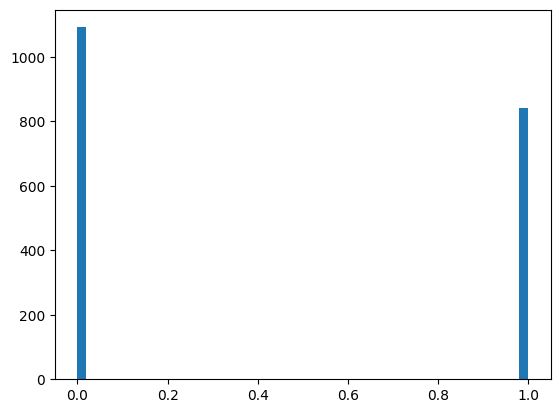

In [4]:
plt.hist(df_raw['target'], bins = 50)
plt.show()

# Apply feature

In [5]:
df, cols = preprocessing.get_feature(df_raw)
df.head()

,Open,High,Low,Close,Adj Close,Volume,returns,target,lag1,lag2,...,SMA_Signal125,SMA145,SMA_Signal145,SMA165,SMA_Signal165,SMA185,SMA_Signal185,fast,slow,CrossOver_Signal
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-06-28 02:15:00,1.095410,1.09565,1.095290,1.095650,1.095650,0,0.000000,0,-0.000110,-0.000110,...,1,1.093762,1,1.093412,1,1.093118,1,-0.000131,-0.000055,-1
2023-06-28 02:30:00,1.095530,1.09553,1.095050,1.095050,1.095050,0,-0.000548,0,0.000000,-0.000110,...,1,1.093785,1,1.093444,1,1.093140,1,-0.000219,-0.000096,-1
2023-06-28 02:45:00,1.095170,1.09517,1.094931,1.094931,1.094931,0,-0.000109,0,-0.000548,0.000000,...,1,1.093809,1,1.093479,1,1.093161,1,-0.000175,-0.000137,-1
2023-06-28 03:00:00,1.095050,1.09505,1.094931,1.094931,1.094931,0,0.000000,0,-0.000109,-0.000548,...,1,1.093833,1,1.093512,1,1.093183,1,-0.000153,-0.000164,1
2023-06-28 03:15:00,1.094931,1.09505,1.094571,1.094691,1.094691,0,-0.000219,1,0.000000,-0.000109,...,1,1.093856,1,1.093542,1,1.093203,1,-0.000175,-0.000178,1


# Scaling data

In [6]:
#standardizing the data
X = preprocessing.get_data_scaled(df, cols)

# Split data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,df.target) #splitting dataset into 2 halves

# Build Model

In [8]:
model = models.create_model_1(cols=cols)
model_history = model.fit(x = X_train, y = y_train, epochs = 10, verbose = False, validation_split = 0.2, shuffle = False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1368)              313272    
                                                                 
 dense_1 (Dense)             (None, 2052)              2809188   
                                                                 
 dense_2 (Dense)             (None, 2736)              5617008   
                                                                 
 dense_3 (Dense)             (None, 228)               624036    
                                                                 
 dense_4 (Dense)             (None, 114)               26106     
                                                                 
 dense_5 (Dense)             (None, 76)                8740      
                                                                 
 dense_6 (Dense)             (None, 57)                4

In [9]:
loss1, acc1, mse1 = model.evaluate(X_train, y_train)
print(f"Loss is {loss1},\nAccuracy is {acc1*100},\nMSE is {mse1}")

41/41 [==============================] - 1s 16ms/step - loss: 0.7398 - acc: 0.4018 - mse: 0.2724
Loss is 0.7398416996002197,
Accuracy is 40.184757113456726,
MSE is 0.2723645269870758


In [10]:
loss1, acc1, mse1 = model.evaluate(X_test, y_test)
print(f"Loss is {loss1},\nAccuracy is {acc1*100},\nMSE is {mse1}")

14/14 [==============================] - 0s 15ms/step - loss: 0.7213 - acc: 0.4309 - mse: 0.2637
Loss is 0.7212954163551331,
Accuracy is 43.08755695819855,
MSE is 0.2637069523334503


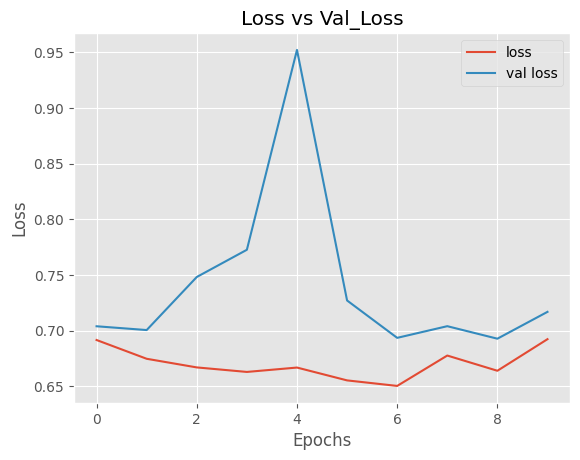

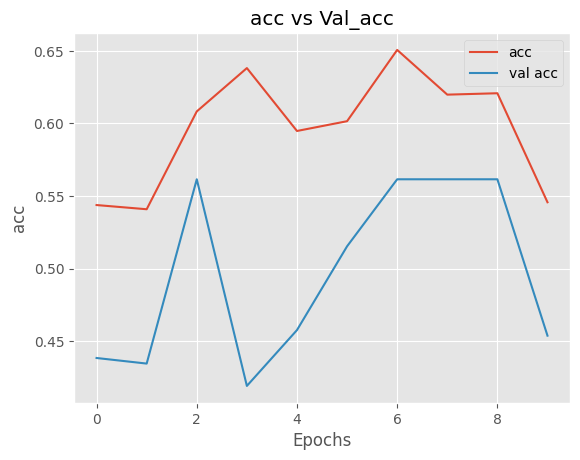

In [11]:
plt.style.use('ggplot')
plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(model_history.history['acc'], label = 'acc')
plt.plot(model_history.history['val_acc'], label='val acc')
plt.title("acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [13]:
model_1 = models.create_model_1(cols=cols)
model_history_1 = model_1.fit(x = X_train, y = y_train, epochs = 10, verbose = False, validation_split = 0.2, shuffle = False)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1368)              313272    
                                                                 
 dense_13 (Dense)            (None, 2052)              2809188   
                                                                 
 dense_14 (Dense)            (None, 2736)              5617008   
                                                                 
 dense_15 (Dense)            (None, 228)               624036    
                                                                 
 dense_16 (Dense)            (None, 114)               26106     
                                                                 
 dense_17 (Dense)            (None, 76)                8740      
                                                                 
 dense_18 (Dense)            (None, 57)               

In [14]:
loss1_1, acc1_1, mse1_1 = model_1.evaluate(X_train, y_train)
print(f"Loss is {loss1_1},\nAccuracy is {acc1_1*100},\nMSE is {mse1_1}")

41/41 [==============================] - 1s 22ms/step - loss: 0.6789 - acc: 0.6128 - mse: 0.2429
Loss is 0.6789401769638062,
Accuracy is 61.27790808677673,
MSE is 0.24292844533920288


In [15]:
loss1_1, acc1_1, mse1_1 = model.evaluate(X_test, y_test)
print(f"Loss is {loss1_1},\nAccuracy is {acc1_1*100},\nMSE is {mse1_1}")

14/14 [==============================] - 0s 27ms/step - loss: 0.7213 - acc: 0.4309 - mse: 0.2637
Loss is 0.7212954163551331,
Accuracy is 43.08755695819855,
MSE is 0.2637069523334503


# Neural Network Optimization

## Added an extra parameter kernel_regularizer, which we set it to ‘l1’ for L1 Regularization.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1368)              313272    
                                                                 
 dense_13 (Dense)            (None, 2052)              2809188   
                                                                 
 dense_14 (Dense)            (None, 2736)              5617008   
                                                                 
 dense_15 (Dense)            (None, 228)               624036    
                                                                 
 dense_16 (Dense)            (None, 114)               26106     
                                                                 
 dense_17 (Dense)            (None, 76)                8740      
                                                                 
 dense_18 (Dense)            (None, 57)               

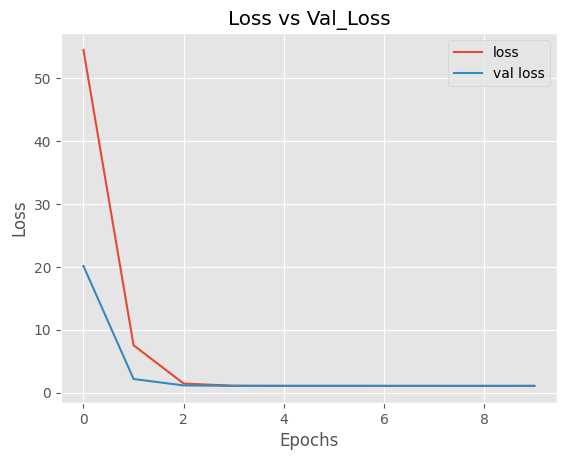

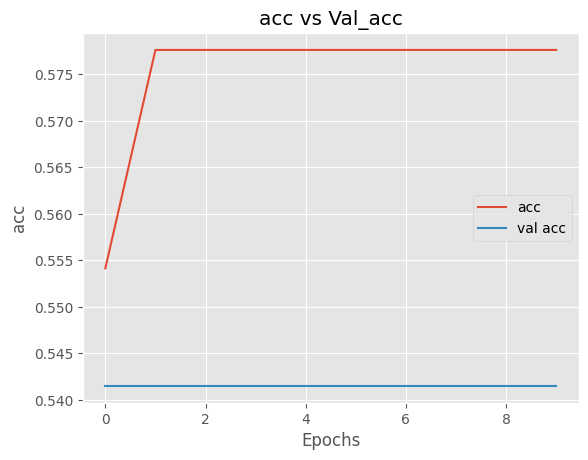

In [ ]:

def create_model_2():
    optimizer = Adam(learning_rate=0.001)
    model = Sequential([
      Dense(len(cols) * 6, activation="relu", input_shape=(len(cols),), kernel_regularizer='l1'),

      Dense(len(cols) * 9, activation="relu"),

      Dense(len(cols) * 12, activation="relu"),

      Dense(len(cols), activation="relu"),

      Dense(int(len(cols) / 2), activation="relu"),

      Dense(int(len(cols) / 3), activation="relu"),

      Dense(int(len(cols) / 4), activation="relu"),

      Dense(int(len(cols) / 5), activation="relu"),

      Dense(int(len(cols) / 6), activation="relu"),

      Dense(len(cols), activation="relu"),
    Dense(1)
    ])

    model.add(Dense(1, use_bias=True, activation = "sigmoid"))

    print(model.summary())

    model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['acc', 'mse'])
    return model




set_seeds(100)
model = create_model_2()
model_history = model.fit(x = X_train , y = y_train, epochs = 10, verbose = False, validation_split = 0.2, shuffle = False)
model.evaluate(X_train, y_train) # evaluate the fit on the train set

loss1, acc1, mse1 = model.evaluate(X_test, y_test)
print(f"Loss is {loss1},\nAccuracy is {acc1*100},\nMSE is {mse1}")

plt.style.use('ggplot')
plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(model_history.history['acc'], label = 'acc')
plt.plot(model_history.history['val_acc'], label='val acc')
plt.title("acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

## Neural Networks with Feature Selection (Correlation Heatmap/PCA)

## Reduse feature

In [ ]:
#df[cols].style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '10px'})

In [ ]:
#df[cols].style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '10px'})

In [ ]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,returns,target,lag1,lag2,...,SMA_Signal125,SMA145,SMA_Signal145,SMA165,SMA_Signal165,SMA185,SMA_Signal185,fast,slow,CrossOver_Signal
Open,1.000000,0.997939,0.998101,0.996043,0.996043,NaN,-0.044335,-0.038396,0.035533,0.040809,...,0.319514,0.718433,0.289863,0.674805,0.290595,0.632812,0.301198,0.047533,0.084328,-0.021010
High,0.997939,1.000000,0.997147,0.998145,0.998145,NaN,-0.002141,-0.036596,0.037871,0.039131,...,0.329813,0.715108,0.298195,0.671461,0.297727,0.629479,0.308066,0.067115,0.099544,-0.012893
Low,0.998101,0.997147,1.000000,0.998078,0.998078,NaN,-0.001992,-0.040771,0.039623,0.040594,...,0.322596,0.716620,0.292662,0.672964,0.293568,0.631067,0.303975,0.067183,0.100151,-0.013151
Close,0.996043,0.998145,0.998078,1.000000,1.000000,NaN,0.036324,-0.039797,0.041574,0.042120,...,0.332873,0.712463,0.301028,0.668808,0.300503,0.626951,0.311232,0.086698,0.116996,-0.007210
Adj Close,0.996043,0.998145,0.998078,1.000000,1.000000,NaN,0.036324,-0.039797,0.041574,0.042120,...,0.332873,0.712463,0.301028,0.668808,0.300503,0.626951,0.311232,0.086698,0.116996,-0.007210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMA185,0.632812,0.629479,0.631067,0.626951,0.626951,NaN,-0.075313,-0.046212,-0.073525,-0.071996,...,-0.307552,0.980932,-0.361372,0.995169,-0.372527,1.000000,-0.366013,-0.159514,-0.191463,0.011841
SMA_Signal185,0.301198,0.308066,0.303975,0.311232,0.311232,NaN,0.112125,-0.006539,0.086812,0.101664,...,0.796341,-0.259516,0.871040,-0.318124,0.936998,-0.366013,1.000000,0.212895,0.261133,-0.015483
fast,0.047533,0.067115,0.067183,0.086698,0.086698,NaN,0.455093,0.028303,0.450563,0.472324,...,0.266568,-0.159629,0.247680,-0.161891,0.218684,-0.159514,0.212895,1.000000,0.801621,0.406699
slow,0.084328,0.099544,0.100151,0.116996,0.116996,NaN,0.382387,0.033876,0.380155,0.377097,...,0.322634,-0.190171,0.290999,-0.193755,0.264865,-0.191463,0.261133,0.801621,1.000000,0.005477


## Neural Networks with Regularization (DropOut and L1/L2)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 1368)              313272    
                                                                 
 dense_156 (Dense)           (None, 2052)              2809188   
                                                                 
 dense_157 (Dense)           (None, 2736)              5617008   
                                                                 
 dense_158 (Dense)           (None, 228)               624036    
                                                                 
 dense_159 (Dense)           (None, 114)               26106     
                                                                 
 dense_160 (Dense)           (None, 76)                8740      
                                                                 
 dense_161 (Dense)           (None, 57)              

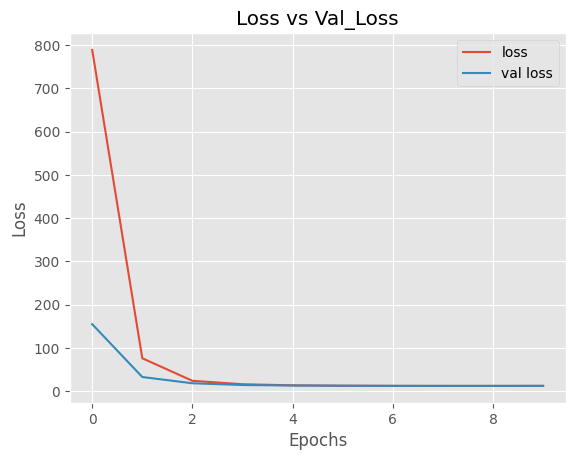

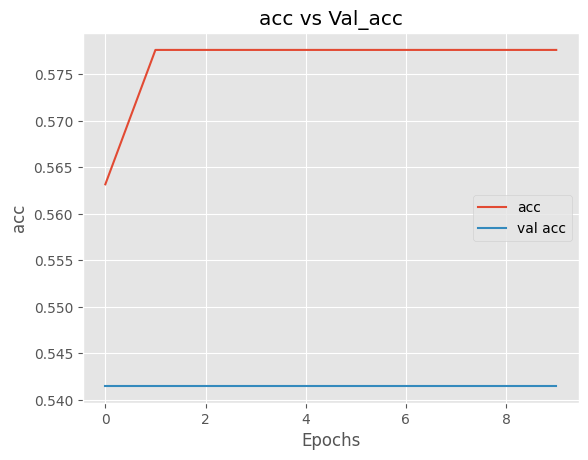

In [ ]:

def create_model_2():
    optimizer = Adam(learning_rate=0.001)
    model = Sequential([
      Dense(len(cols) * 6, activation="relu", input_shape=(len(cols),), kernel_regularizer='l1'),

      Dense(len(cols) * 9, activation="relu", kernel_regularizer='l1'),

      Dense(len(cols) * 12, activation="relu", kernel_regularizer='l1'),

      Dense(len(cols), activation="relu", kernel_regularizer='l1'),

      Dense(int(len(cols) / 2), activation="relu", kernel_regularizer='l1'),

      Dense(int(len(cols) / 3), activation="relu", kernel_regularizer='l1'),

      Dense(int(len(cols) / 4), activation="relu", kernel_regularizer='l1'),

      Dense(int(len(cols) / 5), activation="relu", kernel_regularizer='l1'),

      Dense(int(len(cols) / 6), activation="relu", kernel_regularizer='l1'),

      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
    Dense(1)
    ])

    model.add(Dense(1, use_bias=True, activation = "sigmoid"))

    print(model.summary())

    model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['acc', 'mse'])
    return model


set_seeds(100)
model = create_model_2()
model_history = model.fit(x = X_train, y = y_train, epochs = 10, verbose = False, validation_split = 0.2, shuffle = False)
model.evaluate(X_train, y_train ) # evaluate the fit on the train set

loss1, acc1, mse1 = model.evaluate(X_test, y_test)
print(f"Loss is {loss1},\nAccuracy is {acc1*100},\nMSE is {mse1}")


plt.style.use('ggplot')
plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(model_history.history['acc'], label = 'acc')
plt.plot(model_history.history['val_acc'], label='val acc')
plt.title("acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 228)               52212     
                                                                 
 dense_115 (Dense)           (None, 228)               52212     
                                                                 
 dense_116 (Dense)           (None, 228)               52212     
                                                                 
 dense_117 (Dense)           (None, 228)               52212     
                                                                 
 dense_118 (Dense)           (None, 228)               52212     
                                                                 
 dense_119 (Dense)           (None, 228)               52212     
                                                                 
 dense_120 (Dense)           (None, 228)              

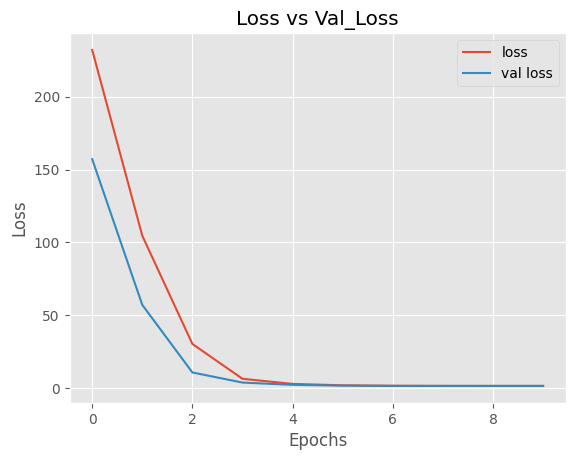

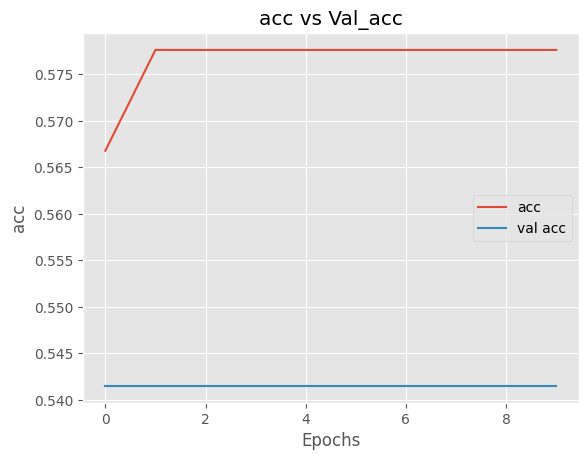

In [ ]:

def create_model_2():
    optimizer = Adam(learning_rate=0.001)
    model = Sequential([
      Dense(len(cols), activation="relu", input_shape=(len(cols),), kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
      Dense(int(len(cols) / 2), activation="relu", kernel_regularizer='l1'),
      Dense(int(len(cols) / 3), activation="relu", kernel_regularizer='l1'),
      Dense(int(len(cols) / 4), activation="relu", kernel_regularizer='l1'),
      Dense(int(len(cols) / 5), activation="relu", kernel_regularizer='l1'),
      Dense(int(len(cols) / 6), activation="relu", kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
    Dense(1)
    ])

    model.add(Dense(1, use_bias=True, activation = "sigmoid"))

    print(model.summary())

    model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['acc', 'mse'])
    return model


set_seeds(100)
model = create_model_2()
model_history = model.fit(x = X_train, y = y_train, epochs = 10, verbose = False, validation_split = 0.2, shuffle = False)
model.evaluate(X_train, y_train ) # evaluate the fit on the train set
loss1, acc1, mse1 = model.evaluate(X_test, y_test)
print(f"Loss is {loss1},\nAccuracy is {acc1*100},\nMSE is {mse1}")

plt.style.use('ggplot')
plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(model_history.history['acc'], label = 'acc')
plt.plot(model_history.history['val_acc'], label='val acc')
plt.title("acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [ ]:

def create_model_2():
    optimizer = Adam(learning_rate=0.001)
    model = Sequential([
      Dense(len(cols), activation="relu", input_shape=(len(cols),), kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
      Dense(int(len(cols) / 2), activation="relu", kernel_regularizer='l1'),
      Dense(int(len(cols) / 3), activation="relu", kernel_regularizer='l1'),
      Dense(int(len(cols) / 4), activation="relu", kernel_regularizer='l1'),
      Dense(int(len(cols) / 5), activation="relu", kernel_regularizer='l1'),
      Dense(int(len(cols) / 6), activation="relu", kernel_regularizer='l1'),
      Dense(len(cols), activation="relu", kernel_regularizer='l1'),
    Dense(1)
    ])

    model.add(Dense(1, use_bias=True, activation = "sigmoid"))

    print(model.summary())

    model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['acc', 'mse'])
    return model


set_seeds(100)
model = create_model_2()
model_history = model.fit(x = X_train, y = y_train, epochs = 10, verbose = False, validation_split = 0.2, shuffle = False)
model.evaluate(X_train, y_train ) # evaluate the fit on the train set
loss1, acc1, mse1 = model.evaluate(X_test, y_test)
print(f"Loss is {loss1},\nAccuracy is {acc1*100},\nMSE is {mse1}")

plt.style.use('ggplot')
plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(model_history.history['acc'], label = 'acc')
plt.plot(model_history.history['val_acc'], label='val acc')
plt.title("acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

## Neural Networks with additional layers (increase model complexity)

## Neural Networks with different optimizers

## Neural Networks with higher epochs (Early Stopping)

## Neural Networks with different activation and initializer

## Neural Networks with smaller batch size